**Install libraries**

In [1]:
!pip install -U numpy
!pip install -U tensorflow
!pip install -U keras
!pip install matplotlib==3.2.2

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.5)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.4.0)
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


**Download Data**

In [2]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2021-01-14 13:56:58--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  9.82MB/s    in 1.0s    

2021-01-14 13:56:59 (9.82 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-01-14 13:57:00--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[=========

**import lib**

In [3]:
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

from keras.models import load_model
from IPython.display import Image, display 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from struct import unpack
import gzip
from numpy import zeros, uint8, float32, exp, max, log2, sum, log
import numpy as np

In [4]:
#Stop all warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

**Loading and processing data**

In [5]:
def read_gz(images,labels):
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]#28
    cols = images.read(4)
    cols = unpack('>I', cols)[0]#28
    # Get metadata for labels
    labels.read(4)  # skip the magic_number
    N = labels.read(4)
    N = unpack('>I', N)[0] #60000

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')
    # Get the data
    x = zeros((N, rows, cols), dtype=float32)  # Initialize array #60000X28X28
    y = zeros((N, 1), dtype=uint8)  # Initialize array
    for i in range(N):
        if i % 1000 == 0:
            print("i: %i" % i)
        for row in range(rows):
            for col in range(cols):
                tmp_pixel = images.read(1)  # Just a single byte
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                x[i][row][col] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (x, y)
 


try:    #training data
        data = np.load("trainData.npz")
        trains_images = data['trains_images']
        train_images_label = data['train_images_label']
except  FileNotFoundError:
        images = gzip.open('train-images-idx3-ubyte.gz', 'rb')
        labels = gzip.open('train-labels-idx1-ubyte.gz', 'rb')
        (trains_images,train_images_label) =read_gz(images, labels);
        np.savez("trainData.npz", trains_images=trains_images, train_images_label=train_images_label)

try:
        data = np.load("testData.npz")
        test_images = data['test_images']
        test_images_label = data['test_images_label']
except  FileNotFoundError:
        images = gzip.open('t10k-images-idx3-ubyte.gz', 'rb')
        labels = gzip.open('t10k-labels-idx1-ubyte.gz', 'rb')
        (test_images,test_images_label) =read_gz(images,labels);
        np.savez("testData.npz", test_images=test_images, test_images_label=test_images_label)


mean_train_images = np.zeros((10, 28, 28), dtype=float32) 
for i in range(10):
	  mean_train_images[i,:,:] = np.mean(trains_images[np.where(train_images_label == i)[0],:,:], axis=0)

std_train_images = np.zeros((10, 28, 28), dtype=float32) 
for i in range(10):
	  std_train_images[i,:,:] = np.std(trains_images[np.where(train_images_label == i)[0],:,:], axis=0)

i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000
i: 40000
i: 41000
i: 42000
i: 43000
i: 44000
i: 45000
i: 46000
i: 47000
i: 48000
i: 49000
i: 50000
i: 51000
i: 52000
i: 53000
i: 54000
i: 55000
i: 56000
i: 57000
i: 58000
i: 59000
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000


**summarize loaded dataset**

In [6]:
trains_images.shape ,test_images.shape 

((60000, 28, 28), (10000, 28, 28))

In [7]:
trainX, trainy, testX, testy = trains_images ,train_images_label ,test_images ,test_images_label 

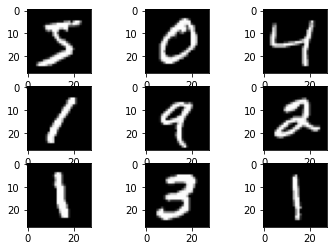

In [8]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [9]:
# one hot encode target values
trainY = to_categorical(trainy)
testY  = to_categorical(testy)

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX  = testX.reshape((testX.shape[0], 28, 28, 1))

# convert from integers to floats
trainX = trainX.astype('float32')
testX  = testX.astype('float32')

# normalize to range 0-1
trainX = trainX / 255.0
testX  = testX / 255.0

**Define CNN Model  & Train**

In [10]:
# define cnn model
def cnn_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def start_train(trainX, trainY):
	#get my model
	model = cnn_model()
	# fit model 
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)
	# save model
	model.save('final_model.h5')

In [11]:
# entry point, run 
start_train(trainX, trainY)

Epoch 1/10
1875/1875 [==============================] - 17s 6ms/step - loss: 0.2684 - accuracy: 0.9161
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0432 - accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0304 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0196 - accuracy: 0.9940
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0147 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0112 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0082 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0065 - accuracy: 0.9982
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

**Model Evaluation on Test Data**

In [14]:
def evaluating(testX ,testY):
    #load Model
    model = load_model('/content/final_model.h5')

    ret ,accuracy = model.evaluate(testX ,testY, verbose=1)

    print("accuracy: {:.2f}".format(accuracy * 100.0))


In [15]:
evaluating(testX ,testY)

313/313 [==============================] - 2s 4ms/step - loss: 0.0304 - accuracy: 0.9915
accuracy: 99.15


**Test sample image**

In [16]:
def load_image(path_img):
    img = load_img(path_img  ,grayscale=True ,target_size=(28,28))

    img = img_to_array(img)

    #reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    #prepare pixel image
    img = img.astype('float32')
    img = img/255.0
    return img
    

In [17]:
def test_img(path_img):
    img = load_image(path_img)

    #load model
    model = load_model('/content/final_model.h5')

    #predict the class
    pred = model.predict_classes(img)

    print("### result ###")
    display(Image(path_img ,width=100, height=100))
    print("result: {}".format(pred[0]))

In [18]:
!wget https://github.com/Ola-Ahmed-Harba/mnist-Challenge/raw/main/samples/samle0.jpg
!wget https://github.com/Ola-Ahmed-Harba/mnist-Challenge/raw/main/samples/sample01.png

--2021-01-14 14:16:21--  https://github.com/Ola-Ahmed-Harba/mnist-Challenge/raw/main/samples/samle0.jpg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Ola-Ahmed-Harba/mnist-Challenge/main/samples/samle0.jpg [following]
--2021-01-14 14:16:22--  https://raw.githubusercontent.com/Ola-Ahmed-Harba/mnist-Challenge/main/samples/samle0.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2191 (2.1K) [image/jpeg]
Saving to: ‘samle0.jpg’

samle0.jpg          100%[===================>]   2.14K  --.-KB/s    in 0s      

2021-01-14 14:16:22 (27.0 MB/s) - ‘samle0.jpg’ saved [2191/2191]

--2021-01-14 14:16:22--  ht

### result ###


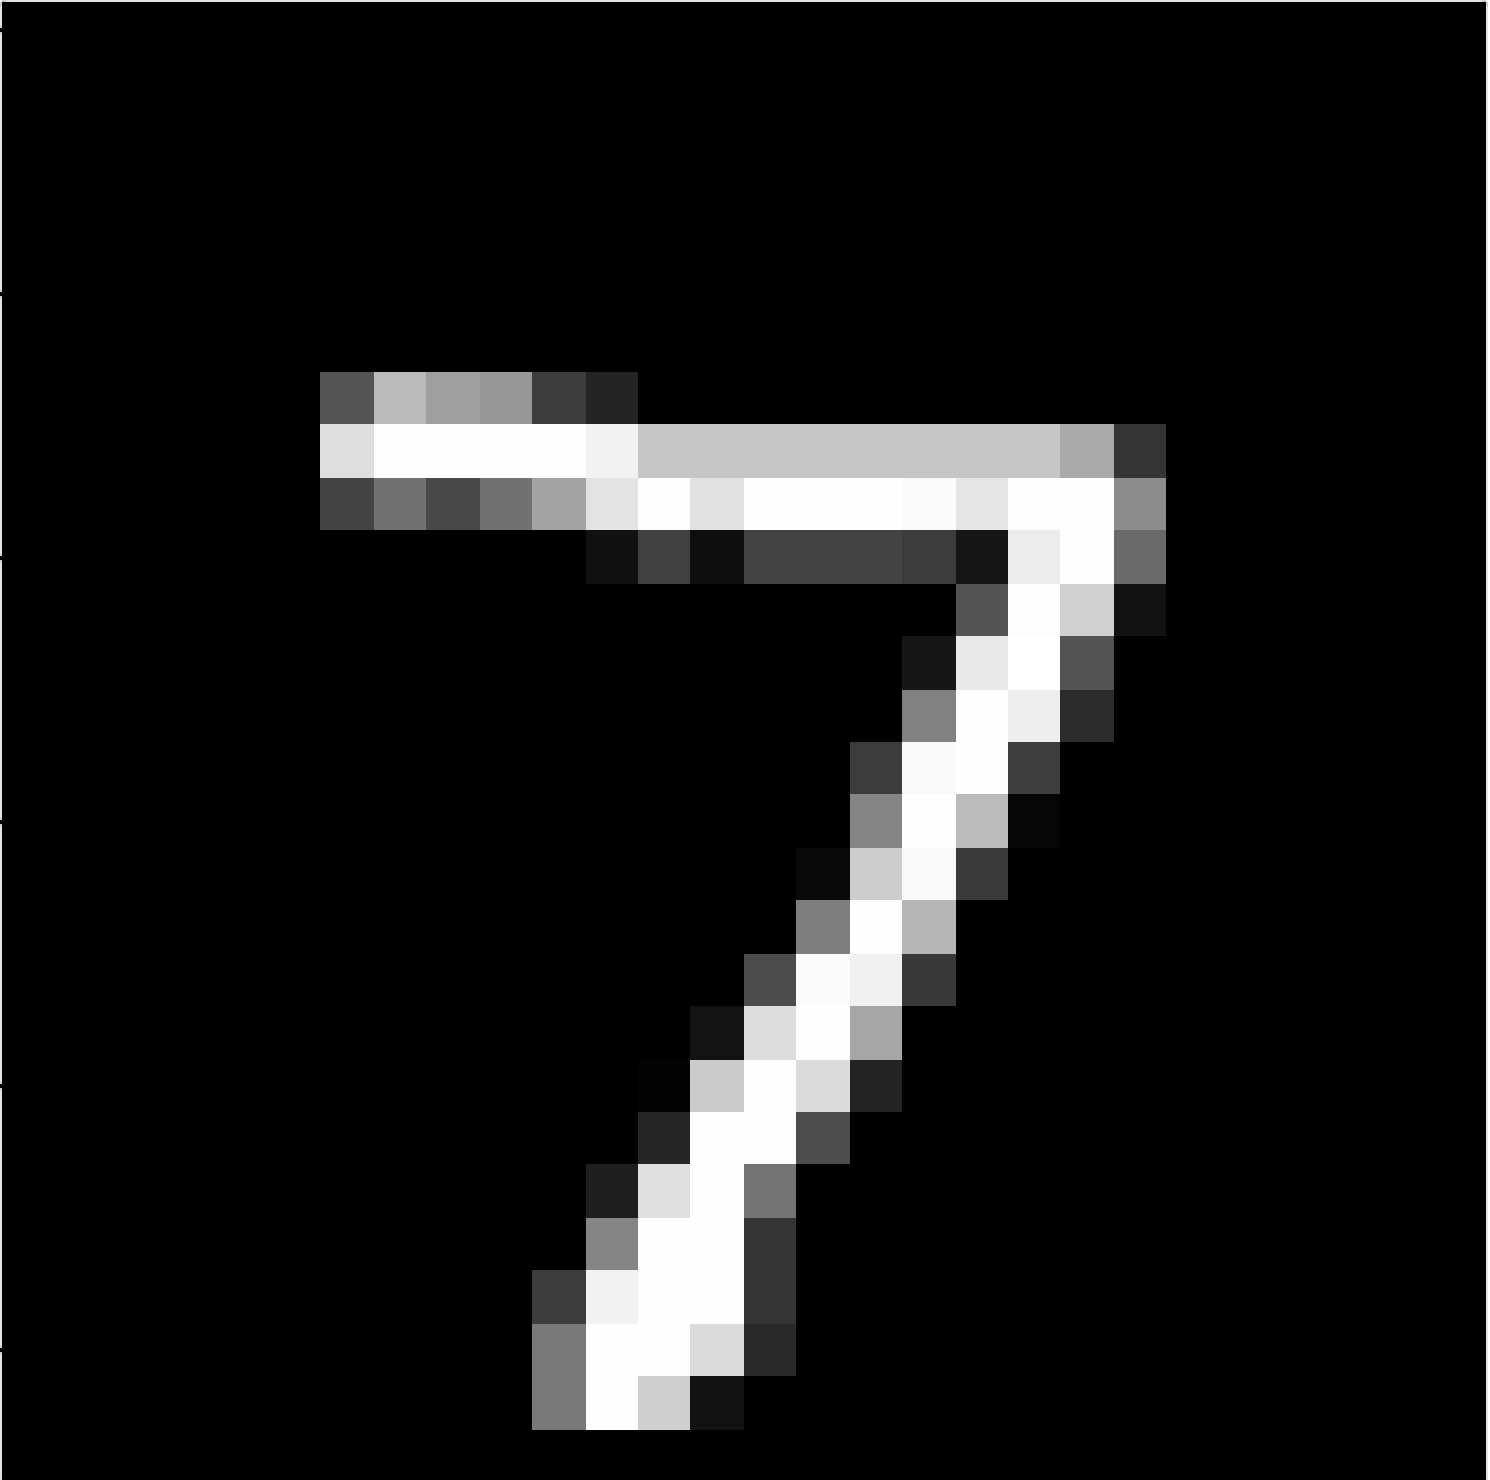

result: 7


In [19]:
test_img("sample01.png")

### result ###


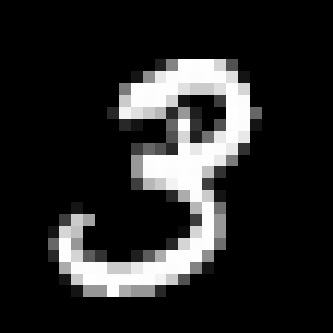

result: 3


In [20]:
test_img("samle0.jpg")

**Done..**